### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


In [2]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!pip install -U -q PyDrive
!pip install cmake
!pip install dlib
!pip install face_recognition
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!gunzip t*-ubyte.gz

     |████████████████████████████████| 26.6MB 1.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
Cloning into 'Flowers'...
remote: Enumerating objects: 4330, done.
remote: Counting objects: 100% (4330/4330), done.
remote: Compressing objects: 100% (4328/4328), done.
remote: Total 4330 (delta 0), reused 4330 (delta 0), pack-reused 0
Receiving objects: 100% (4330/4330), 224.05 MiB | 12.02 MiB/s, done.
     |████████████████████████████████| 993kB 26.7MB/s 
     |████████████████████████████████| 100.2MB 1.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  3303k      0  0:00:02  0:00:02 --:--:-- 3302k
  % Total    % Rece

In [3]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!gunzip t*-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  3583k      0  0:00:02  0:00:02 --:--:-- 3583k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0  43041      0 --:--:-- --:--:-- --:--:-- 42977
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0   887k      0  0:00:01  0:00:01 --:--:--  887k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  10229      0 --:--:-- --:--:-- --:--:-- 10229
gzip: t10k-images-idx3-ubyte already exists; do you 

In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals
import cv2
import tensorflow as tf
import numpy
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import face_recognition
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from mlxtend.data import loadlocal_mnist
print(tf.__version__)
from keras import backend as K
import keras.preprocessing.image


tf.enable_eager_execution()  


1.13.1


##### Task 1. Dataloader

In [0]:
train, train_labels = loadlocal_mnist(
        images_path='/content/train-images-idx3-ubyte', 
        labels_path='/content/train-labels-idx1-ubyte')
test, test_labels = loadlocal_mnist(
        images_path='/content/t10k-images-idx3-ubyte', 
        labels_path='/content/t10k-labels-idx1-ubyte')

class_names = np.unique(train_labels)
train = train.reshape(-1, 28, 28 , 1).astype('float32')
test = test.reshape(-1, 28, 28 , 1).astype('float32')

In [26]:
print('Train Dimensions: %s x %s' % (train.shape[0], train.shape[1]))
print('Test Dimensions: %s x %s' % (test.shape[0], test.shape[1]))


Train Dimensions: 60000 x 28
Test Dimensions: 10000 x 28


In [0]:
num_train = train.shape[0]
num_test = test.shape[0]

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


##### Task 2. Augmentation

Text(0.5, 1.0, 'Label: 5')

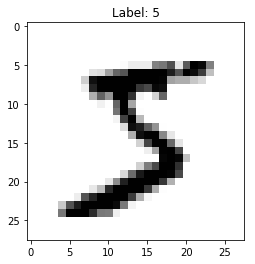

In [29]:
image = train[0].reshape(28,28)
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label: '+ str(train_labels[0]))

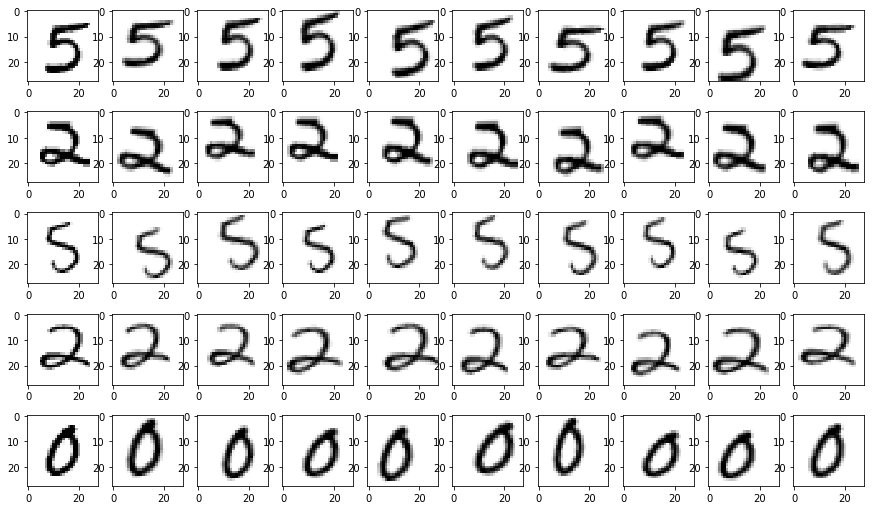

In [30]:
def generate_images(imgs, label):
    
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
    
    return imgs[0]

fig,axs = plt.subplots(5,10, figsize=(15,9))
for i in range(5):
    n = np.random.randint(0,train.shape[0]-2)
    axs[i,0].imshow(train[n:n+1].reshape(28,28),cmap=plt.cm.binary)
    for j in range(1,10):
      axs[i,j].imshow(generate_images(train[n:n+1], train_labels[n]).reshape(28,28), cmap=plt.cm.binary)

In [31]:
image_generator = keras.preprocessing.image.ImageDataGenerator(
      rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
      zoom_range = 0.1)
print(train.shape[0])
image_generator.fit(train)
imgs = image_generator.flow(train,train_labels, batch_size=64).next()
print(train.shape[0])


60000
60000


In [0]:
train = np.append(train, imgs[0], axis=0)
train_labels = np.append(train_labels, imgs[1])

In [0]:
train_data = tf.data.Dataset.from_tensor_slices((tf.constant(train), tf.constant(train_labels))).map(normalize)
test_data = tf.data.Dataset.from_tensor_slices((tf.constant(test), tf.constant(test_labels))).map(normalize)

##### Task 3. Neural Network

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=1),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=1),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##### Task 4. Train loop

In [44]:
BATCH_SIZE = 64
train_data = train_data.repeat().shuffle(num_train).batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)

history = model.fit(train_data.repeat(), epochs = 20, steps_per_epoch=math.ceil(num_train/BATCH_SIZE), validation_data=test_data.repeat(), validation_steps=20)

Epoch 1/20
938/938 [==============================] - 20s 22ms/step - loss: 0.4403 - acc: 0.8601 - val_loss: 0.0999 - val_acc: 0.9688
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 0.1230 - acc: 0.9622 - val_loss: 0.0677 - val_acc: 0.9758
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0891 - acc: 0.9726 - val_loss: 0.0514 - val_acc: 0.9836
Epoch 4/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0725 - acc: 0.9781 - val_loss: 0.0416 - val_acc: 0.9852
Epoch 5/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0624 - acc: 0.9803 - val_loss: 0.0382 - val_acc: 0.9859
Epoch 6/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0530 - acc: 0.9834 - val_loss: 0.0343 - val_acc: 0.9852
Epoch 7/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0490 - acc: 0.9849 - val_loss: 0.0281 - val_acc: 0.9898
Epoch 8/20
938/938 [==============================] - 14s 15ms

##### Task 5. Loss plot

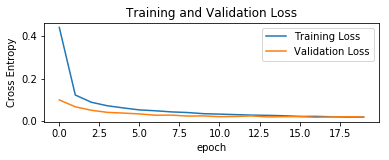

Text(0.5, 1.0, 'Training and Validation Accuracy')

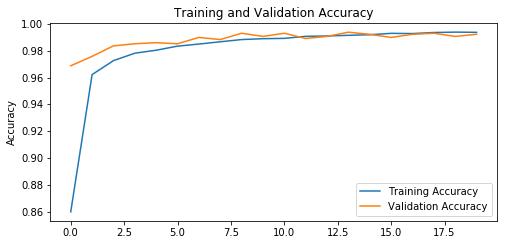

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

##### Task 6. Test set accuracy

In [46]:
test_loss, test_accuracy = model.evaluate(test_data, steps=math.ceil(num_test/64))
print('Accuracy on test dataset:', test_accuracy)

157/157 [==============================] - 1s 6ms/step - loss: 0.0164 - acc: 0.9944
Accuracy on test dataset: 0.9944


##### Task 7. Inference

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


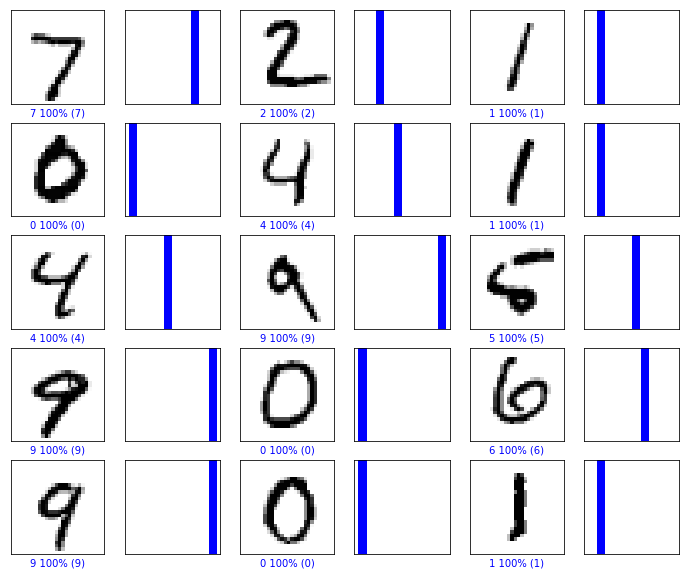

In [50]:
for test_image, test_label in test_data.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predictions = model.predict(test_image)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)